# ```sampley``` exemplar: the grid approach
Before going through this exemplar, please consult the _Introduction to sampley exemplars_ (```intro.ipynb```).
<br>This exemplar illustrates an application of the grid approach to data contained within two files: one containing survey tracks (```sections.gpkg```) and one containing sightings data (```sightings.gpkg```).

## Setup

### Import the package

In [1]:
from sampley import *

### Set the input folder
To run this exemplar, download the mock data files, put them in a folder, and set the path to the folder below.

In [2]:
input_folder = './input/'

### Set the output folder
To run this exemplar, make a folder to save the outputs in and set the path to the folder below.

In [3]:
output_folder = './output/'

## Stage 1
In Stage 1, we import two files (```sightings.csv``` and ```sections.gpkg```) and from them make a ```DataPoints``` and a ```Sections``` object, respectively.
<br>Although we use a CSV file and a GPKG file in this exemplar, there are other options for file types (including XLSX and SHP files). Please see the Stage 1 exemplar (```stage-1.ipynb```) in the horizontal exemplars folder or the User Manual for more details. Note that, regardless of the input file type, once any ```DataPoints``` and/or ```Sections``` objects have been made, the subsequent processing will be the same.

In [4]:
u_sightings = DataPoints.from_file(
    filepath=input_folder+'sightings.csv',
    x_col='lon',
    y_col='lat',
    crs_input='EPSG:4326',
    crs_working='EPSG:32619',
    datetime_col='datetime',
    tz_input='UTC-05:00'
)

Success: file opened.
Success: X and Y coordinates parsed.
Success: reprojected to CRS "EPSG:32619"
Success: column "datetime" reformatted to datetimes.
Success: timezone of column "datetime" set to "UTC-05:00".
Success: datapoint IDs generated.


In [5]:
u_sections = Sections.from_file(
    filepath=input_folder+'sections.gpkg',
    crs_working='EPSG:32619',
    datetime_col='datetime_beg',
    tz_input='UTC-05:00'
)

Success: file opened.
Success: reprojected to CRS "EPSG:32619"
Success: column "datetime_beg" reformatted to datetimes.
Success: timezone of column "datetime_beg" set to "UTC-05:00".
Note: column "datetime_beg" renamed to "datetime".
Success: section IDs generated.


## Stage 2
In Stage 2, we use the ```Sections``` object to make a ```Periods``` object containing periods of 8 days and a ```Cells``` object containing hexagonal cells with 5000 m sides.

In [6]:
u_periods = Periods.delimit(
    extent=u_sections,
    unit='day',
    num=8)

In [7]:
u_periods.periods  # print the periods DataFrame

,period_id,date_beg,date_mid,date_end
0,p2019-01-25-8d,2019-01-25 00:00:00-05:00,2019-01-29 00:00:00-05:00,2019-02-01 00:00:00-05:00
1,p2019-02-02-8d,2019-02-02 00:00:00-05:00,2019-02-06 00:00:00-05:00,2019-02-09 00:00:00-05:00
2,p2019-02-10-8d,2019-02-10 00:00:00-05:00,2019-02-14 00:00:00-05:00,2019-02-17 00:00:00-05:00
3,p2019-02-18-8d,2019-02-18 00:00:00-05:00,2019-02-22 00:00:00-05:00,2019-02-25 00:00:00-05:00
4,p2019-02-26-8d,2019-02-26 00:00:00-05:00,2019-03-02 00:00:00-05:00,2019-03-05 00:00:00-05:00


In [8]:
u_cells = Cells.delimit(
    extent=u_sections,
    var='hexagonal',
    side=5000)

In [9]:
u_cells.cells  # print the cells GeoDataFrame

,cell_id,polygon,centroid
0,c001-h5000m,"POLYGON ((500095.62 4701798.087, 504425.747 46...",POINT (500095.62 4696798.087)
1,c002-h5000m,"POLYGON ((508755.874 4701798.087, 513086.001 4...",POINT (508755.874 4696798.087)
2,c003-h5000m,"POLYGON ((517416.128 4701798.087, 521746.255 4...",POINT (517416.128 4696798.087)
3,c004-h5000m,"POLYGON ((526076.382 4701798.087, 530406.509 4...",POINT (526076.382 4696798.087)
4,c005-h5000m,"POLYGON ((534736.636 4701798.087, 539066.763 4...",POINT (534736.636 4696798.087)
...,...,...,...
175,c176-h5000m,"POLYGON ((629999.43 4761798.087, 634329.557 47...",POINT (629999.43 4756798.087)
176,c177-h5000m,"POLYGON ((638659.684 4761798.087, 642989.811 4...",POINT (638659.684 4756798.087)
177,c178-h5000m,"POLYGON ((647319.938 4761798.087, 651650.065 4...",POINT (647319.938 4756798.087)
178,c179-h5000m,"POLYGON ((655980.192 4761798.087, 660310.319 4...",POINT (655980.192 4756798.087)


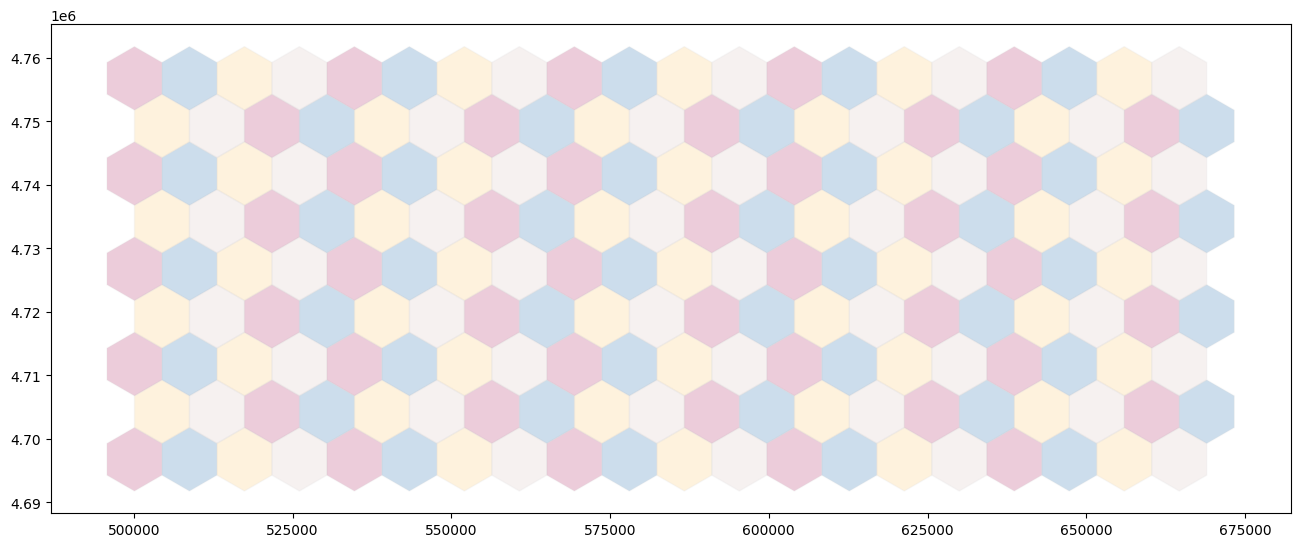

In [10]:
u_cells.plot()  # plot the cells

## Stage 3
In Stage 3, we, firstly, make two ```Samples``` objects:
- one from the ```DataPoints``` object containing sightings data, the ```Periods``` objects, and the ```Cells``` object
- one from the ```Sections``` object, the ```Periods``` objects, and the ```Cells``` object

Then, we merge these two ```Samples``` objects to make our final ```Samples``` object.

In [11]:
u_samples_sightings = Samples.grid(
    datapoints=u_sightings,
    cells=u_cells,
    periods=u_periods,
    cols={'individuals': 'sum'})

In [12]:
u_samples_effort = Samples.grid_se(
    sections=u_sections,
    cells=u_cells,
    periods=u_periods)

In [13]:
u_samples = Samples.merge(
    sightings=u_samples_sightings,
    effort=u_samples_effort)


Note: samples generated with the grid approach


## Output
Finally, we save the final ```Samples``` object to the output folder.

In [14]:
u_samples.save(
    folder=output_folder,
    filetype='csv',
    crs_output='EPSG:4326'
)

Success: additional geometry column "centroid" reprojected to CRS "EPSG:4326"
Success: reprojected to CRS "EPSG:4326"


In the output folder, there should be two new CSVs: the first should have the same name as the ```Samples``` object (run the box below to see the name) while the second should also have this name but with ```-parameters``` added at the end.

In [15]:
u_samples.name

'samples-sightings+effort-x-cells-h5000m-x-periods-8d'

The first CSV should contain the samples, like those shown in the box below. 
<br>In this dataframe, each row represents a given cell in a given period, i.e., a sample. 
<br>The columns ```polygon```, ```datetime_beg```, and ```datetime_end``` delimit the extent of the cell and period, while the columns ```centroid``` and ```datetime_mid``` represent the centre of the cell and period, respectively.
<br>At the end are the data columns. In this particular example, they are ```individuals``` and ```se_length```.

In [16]:
u_samples.samples

,cell_id,polygon,centroid,period_id,date_beg,date_mid,date_end,individuals,se_length
0,c013-h5000m,"POLYGON ((604018.668 4701798.087, 608348.795 4...",POINT (604018.668 4696798.087),p2019-02-02-8d,2019-02-02 00:00:00-05:00,2019-02-06 00:00:00-05:00,2019-02-09 00:00:00-05:00,NaN,6000.522001
1,c014-h5000m,"POLYGON ((612678.922 4701798.087, 617009.049 4...",POINT (612678.922 4696798.087),p2019-02-02-8d,2019-02-02 00:00:00-05:00,2019-02-06 00:00:00-05:00,2019-02-09 00:00:00-05:00,4.0,8662.115497
2,c015-h5000m,"POLYGON ((621339.176 4701798.087, 625669.303 4...",POINT (621339.176 4696798.087),p2019-02-02-8d,2019-02-02 00:00:00-05:00,2019-02-06 00:00:00-05:00,2019-02-09 00:00:00-05:00,2.0,8661.560380
3,c016-h5000m,"POLYGON ((629999.43 4701798.087, 634329.557 46...",POINT (629999.43 4696798.087),p2019-02-02-8d,2019-02-02 00:00:00-05:00,2019-02-06 00:00:00-05:00,2019-02-09 00:00:00-05:00,NaN,8662.595905
4,c017-h5000m,"POLYGON ((638659.684 4701798.087, 642989.811 4...",POINT (638659.684 4696798.087),p2019-02-02-8d,2019-02-02 00:00:00-05:00,2019-02-06 00:00:00-05:00,2019-02-09 00:00:00-05:00,NaN,8662.002385
...,...,...,...,...,...,...,...,...,...
96,c128-h5000m,"POLYGON ((560717.398 4746798.087, 565047.525 4...",POINT (560717.398 4741798.087),p2019-01-25-8d,2019-01-25 00:00:00-05:00,2019-01-29 00:00:00-05:00,2019-02-01 00:00:00-05:00,NaN,8661.000942
97,c129-h5000m,"POLYGON ((569377.652 4746798.087, 573707.779 4...",POINT (569377.652 4741798.087),p2019-01-25-8d,2019-01-25 00:00:00-05:00,2019-01-29 00:00:00-05:00,2019-02-01 00:00:00-05:00,NaN,8661.175721
98,c130-h5000m,"POLYGON ((578037.906 4746798.087, 582368.033 4...",POINT (578037.906 4741798.087),p2019-01-25-8d,2019-01-25 00:00:00-05:00,2019-01-29 00:00:00-05:00,2019-02-01 00:00:00-05:00,1.0,6386.031468
99,c139-h5000m,"POLYGON ((655980.192 4746798.087, 660310.319 4...",POINT (655980.192 4741798.087),p2019-02-02-8d,2019-02-02 00:00:00-05:00,2019-02-06 00:00:00-05:00,2019-02-09 00:00:00-05:00,NaN,9157.070699


The second CSV should contain the parameters, like those shown in the box below (but arranged in a table). This information may prove useful if, later, we need to know  how the samples were generated.

In [17]:
u_samples.parameters

{'name': 'samples-sightings+effort-x-cells-h5000m-x-periods-8d',
 'names': 'samples-datapoints-sightings-x-cells-h5000m-x-periods-8d+samples-sections-sections-x-cells-h5000m-x-periods-8d',
 'approach': 'grid',
 'resampled': 'datapoints; effort',
 'datapoints_name': 'datapoints-sightings; nan',
 'datapoints_filepath': './input/sightings.csv; nan',
 'datapoints_crs': 'EPSG:32619; nan',
 'datapoints_tz': 'UTC-05:00; nan',
 'datapoints_data_cols': 'individuals; nan',
 'cells_name': 'cells-h5000m',
 'cells_crs': 'EPSG:32619',
 'cells_extent': '495765.49253164633, 4691798.086839909, 673300.7003074563, 4761798.086839909',
 'cells_extent_source': 'Sections - sections-sections',
 'cells_var': 'hexagonal',
 'cells_side': '5000',
 'cells_unit': 'metre',
 'cells_buffer': 'None',
 'periods_name': 'periods-8d',
 'periods_tz': 'UTC-05:00',
 'periods_extent': '2019-01-25-2019-03-05',
 'periods_extent_source': 'Sections - sections-sections',
 'periods_number': '8',
 'periods_unit': 'day',
 'cols': "{'i